# Task 01

In [134]:
import pandas as pd

# Load the dataset
file_path = r'E:\IS_733\Baltimore911.csv'
# Assuming the problematic column is column 7, specify its data type
df = pd.read_csv(file_path, dtype={'Post': 'str'}, low_memory=False)
# Display the first few rows of the dataset to understand its structure
df.head()


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,02/08/2020,2:18:00,5D,1700 CLIFTVIEW AVE,BURGLARY,I,NaN,312,EASTERN,DARLEY PARK,-76.593870,39.315341,NaN,GROCERY/CONFECTION,Eastern 1,1
1,02/08/2020,6:00:00,6G,700 N STREEPER ST,LARCENY,I,NaN,333,EASTERN,MADISON EASTEND,-76.577425,39.299094,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
4,02/08/2020,17:30:00,5A,1600 E OLIVER ST,BURGLARY,I,NaN,314,EASTERN,OLIVER,-76.595946,39.307350,NaN,ROW/TOWNHOUSE-OCC,Eastern 1,1


Initial Data:
    CrimeDate CrimeTime CrimeCode            Location          Description  \
0  02/08/2020   2:18:00        5D  1700 CLIFTVIEW AVE             BURGLARY   
1  02/08/2020   6:00:00        6G   700 N STREEPER ST              LARCENY   
2  02/08/2020   9:50:00       3JF     1400 N BROADWAY  ROBBERY - RESIDENCE   
3  02/08/2020   9:50:00       3JF     1400 N BROADWAY  ROBBERY - RESIDENCE   
4  02/08/2020  17:30:00        5A    1600 E OLIVER ST             BURGLARY   

  Inside/Outside   Weapon Post District     Neighborhood  Longitude  \
0              I      NaN  312  EASTERN      DARLEY PARK -76.593870   
1              I      NaN  333  EASTERN  MADISON EASTEND -76.577425   
2              I  FIREARM  314  EASTERN           OLIVER -76.594992   
3              I  FIREARM  314  EASTERN           OLIVER -76.594992   
4              I      NaN  314  EASTERN           OLIVER -76.595946   

    Latitude  Location 1             Premise  vri_name1  Total Incidents  
0  39.315341   

D:\ann\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



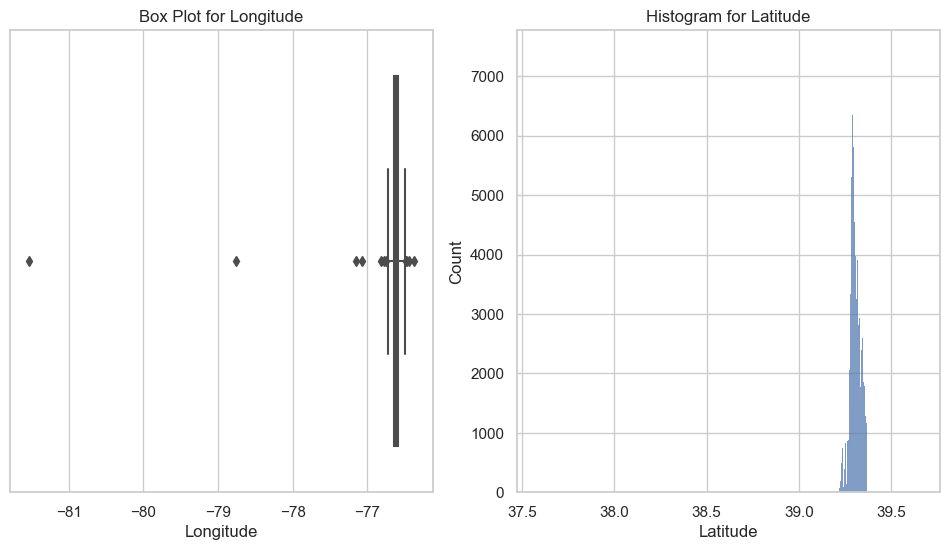


Cleaned Data:
    CrimeDate CrimeTime CrimeCode            Location          Description  \
0  02/08/2020   2:18:00        5D  1700 CLIFTVIEW AVE             BURGLARY   
1  02/08/2020   6:00:00        6G   700 N STREEPER ST              LARCENY   
2  02/08/2020   9:50:00       3JF     1400 N BROADWAY  ROBBERY - RESIDENCE   
3  02/08/2020   9:50:00       3JF     1400 N BROADWAY  ROBBERY - RESIDENCE   
4  02/08/2020  17:30:00        5A    1600 E OLIVER ST             BURGLARY   

  Inside/Outside   Weapon Post District     Neighborhood  Longitude  \
0              I      NaN  312  EASTERN      DARLEY PARK -76.593870   
1              I      NaN  333  EASTERN  MADISON EASTEND -76.577425   
2              I  FIREARM  314  EASTERN           OLIVER -76.594992   
3              I  FIREARM  314  EASTERN           OLIVER -76.594992   
4              I      NaN  314  EASTERN           OLIVER -76.595946   

    Latitude  Location 1             Premise  vri_name1  Total Incidents  
0  39.315341  

In [135]:
# Data Cleaning

import seaborn as sns
import matplotlib.pyplot as plt

# Initial data exploration
print("Initial Data:")
print(df.head())

# Data Visualization
plt.figure(figsize=(12, 6))

# Box plot for Longitude
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Longitude'])
plt.title('Box Plot for Longitude')

# Histogram for Latitude
plt.subplot(1, 2, 2)
sns.histplot(x=df['Latitude'])
plt.title('Histogram for Latitude')

plt.show()

# Handling Outliers
outliers = (
    (df['Longitude'] < -180) | (df['Longitude'] > 180) |
    (df['Latitude'] < -90) | (df['Latitude'] > 90)
)

# Replace outliers with NaN
df.loc[outliers, ['Longitude', 'Latitude']] = None

# Handling Missing Values
df.dropna(subset=['Longitude', 'Latitude'], inplace=True)

# Save Cleaned Data to the same file
df.to_csv(file_path, index=False)

# Display cleaned data
print("\nCleaned Data:")
print(df.head())

In [136]:
#data_profiling 
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291126 entries, 0 to 291125
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        291126 non-null  object 
 1   CrimeTime        291100 non-null  object 
 2   CrimeCode        291126 non-null  object 
 3   Location         290376 non-null  object 
 4   Description      291126 non-null  object 
 5   Inside/Outside   257792 non-null  object 
 6   Weapon           61220 non-null   object 
 7   Post             290379 non-null  object 
 8   District         291126 non-null  object 
 9   Neighborhood     281159 non-null  object 
 10  Longitude        291126 non-null  float64
 11  Latitude         291126 non-null  float64
 12  Location 1       0 non-null       float64
 13  Premise          257540 non-null  object 
 14  vri_name1        34576 non-null   object 
 15  Total Incidents  291126 non-null  int64  
dtypes: float64(3), int64(1), object(12)
me

In [137]:
# Overview of the dataset
# 1. Total number of call instances (rows) and features (columns)
num_rows, num_columns = df.shape

missing_values = (df.isnull().sum() / len(df)) * 100

print(f"Total number of rows: {total_rows}")
print(f"Total number of columns: {total_columns}")
print(f"Missing values per column (%):\n{missing_values}")


Total number of rows: 291126
Total number of columns: 16
Missing values per column (%):
CrimeDate            0.000000
CrimeTime            0.008931
CrimeCode            0.000000
Location             0.257620
Description          0.000000
Inside/Outside      11.450025
Weapon              78.971305
Post                 0.256590
District             0.000000
Neighborhood         3.423604
Longitude            0.000000
Latitude             0.000000
Location 1         100.000000
Premise             11.536586
vri_name1           88.123356
Total Incidents      0.000000
dtype: float64


In [138]:
# --- Identify column types ---
temporal_columns = ['CrimeDate', 'CrimeTime']
spatial_columns = ['Longitude', 'Latitude']
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
discrete_columns = df.select_dtypes(include=['object']).columns.tolist()

# Remove identified temporal and spatial columns from numeric and discrete columns
numeric_columns = [col for col in numeric_columns if col not in spatial_columns]
discrete_columns = [col for col in discrete_columns if col not in temporal_columns]

# --- Display column categorization ---
print(f"Numeric/Continuous columns: {numeric_columns}")
print(f"Discrete/Symbolic columns: {discrete_columns}")
print(f"Temporal columns: {temporal_columns}")
print(f"Spatial columns: {spatial_columns}")

Numeric/Continuous columns: ['Location 1', 'Total Incidents']
Discrete/Symbolic columns: ['CrimeCode', 'Location', 'Description', 'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood', 'Premise', 'vri_name1']
Temporal columns: ['CrimeDate', 'CrimeTime']
Spatial columns: ['Longitude', 'Latitude']


In [139]:
# For numeric columns, calculate min, max, mean, median, and standard deviation
numeric_stats = df[numeric_columns].describe().T
numeric_stats['median'] = df[numeric_columns].median()

print("Numeric columns statistics:\n", numeric_stats)

Numeric columns statistics:
                     count  mean  std  min  25%  50%  75%  max  median
Location 1            0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN
Total Incidents  291126.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0     1.0


In [140]:
# Display basic statistics for Longitude and Latitude columns (numericals)
longitude_stats = df['Longitude'].describe()
latitude_stats = df['Latitude'].describe()

# Calculate Mean, Median, and Standard Deviation for both Longitude and Latitude
longitude_mean = df['Longitude'].mean()
longitude_median = df['Longitude'].median()
longitude_std_dev = df['Longitude'].std()

latitude_mean = df['Latitude'].mean()
latitude_median = df['Latitude'].median()
latitude_std_dev = df['Latitude'].std()

# Min and Max values for Longitude
longitude_min = df['Longitude'].min()
longitude_max = df['Longitude'].max()
print("Minimum Value (Longitude):", longitude_min)
print("Maximum Value (Longitude):", longitude_max)

# Min and Max values for Latitude
latitude_min = df['Latitude'].min()
latitude_max = df['Latitude'].max()
print("Minimum Value (Latitude):", latitude_min)
print("Maximum Value (Latitude):", latitude_max)

# Display the results for Longitude
print("Basic Statistics for Longitude:")
print(longitude_stats)
print("\nMean (Longitude):", longitude_mean)
print("Median (Longitude):", longitude_median)
print("Standard Deviation (Longitude):", longitude_std_dev)
print("Minimum Value:", longitude_min)
print("Maximum Value:", longitude_max)

# Display the results for Latitude
print("\nBasic Statistics for Latitude:")
print(latitude_stats)
print("\nMean (Latitude):", latitude_mean)
print("Median (Latitude):", latitude_median)
print("Standard Deviation (Latitude):", latitude_std_dev)
print("Minimum Value:", latitude_min)
print("Maximum Value:", latitude_max)

Minimum Value (Longitude): -81.5291885
Maximum Value (Longitude): -76.38322763
Minimum Value (Latitude): 37.57726184
Maximum Value (Latitude): 39.66133158
Basic Statistics for Longitude:
count    291126.000000
mean        -76.617452
std           0.043734
min         -81.529189
25%         -76.649094
50%         -76.613977
75%         -76.587080
max         -76.383228
Name: Longitude, dtype: float64

Mean (Longitude): -76.61745184626443
Median (Longitude): -76.6139769
Standard Deviation (Longitude): 0.04373447607928038
Minimum Value: -81.5291885
Maximum Value: -76.38322763

Basic Statistics for Latitude:
count    291126.000000
mean         39.306746
std           0.029658
min          37.577262
25%          39.288186
50%          39.302672
75%          39.326965
max          39.661332
Name: Latitude, dtype: float64

Mean (Latitude): 39.30674569832813
Median (Latitude): 39.30267161
Standard Deviation (Latitude): 0.029657887347020687
Minimum Value: 37.57726184
Maximum Value: 39.66133158


In [141]:
# --- Discrete attributes statistics ---
discrete_stats = {}
for col in discrete_columns:
    unique_values = df[col].nunique()
    top_values = df[col].value_counts().nlargest(3).to_dict()
    discrete_stats[col] = {"unique_values": unique_values, "top_values": top_values}

print("\nDiscrete columns statistics:")
for col, stats in discrete_stats.items():
    print(f"{col}: Unique values = {stats['unique_values']}, Top 3 values = {stats['top_values']}")



Discrete columns statistics:
CrimeCode: Unique values = 81, Top 3 values = {'4E': 47851, '6D': 38592, '5A': 25295}
Location: Unique values = 26418, Top 3 values = {'1500 RUSSELL ST': 847, '3500 BOSTON ST': 708, '2400 FREDERICK AVE': 558}
Description: Unique values = 14, Top 3 values = {'LARCENY': 65129, 'COMMON ASSAULT': 47851, 'BURGLARY': 42147}
Inside/Outside: Unique values = 4, Top 3 values = {'O': 127949, 'I': 124078, 'Outside': 5107}
Weapon: Unique values = 5, Top 3 values = {'FIREARM': 28895, 'OTHER': 17238, 'KNIFE': 9960}
Post: Unique values = 133, Top 3 values = {'114': 5227, '913': 4977, '111': 4915}
District: Unique values = 10, Top 3 values = {'NORTHEAST': 44000, 'SOUTHEAST': 41579, 'CENTRAL': 33355}
Neighborhood: Unique values = 278, Top 3 values = {'DOWNTOWN': 9294, 'FRANKFORD': 6901, 'BELAIR-EDISON': 6183}
Premise: Unique values = 125, Top 3 values = {'STREET': 104141, 'ROW/TOWNHOUSE-OCC': 53932, 'APT/CONDO - OCCUPIED': 11611}
vri_name1: Unique values = 8, Top 3 values =

In [142]:
# Calculate the total number of unique values for 'Total Incidents'
num_unique_values = df['Total Incidents'].nunique()

# Get the counts of each unique value, and retrieve the top 3 most frequent values
top_3_values = df['Total Incidents'].value_counts().nlargest(3)

# Display the total number of unique values
print("Total number of unique values in 'Total Incidents':", num_unique_values)

# Display the top 3 most frequent values
print("\nTop 3 values with the largest count:")
print(top_3_values)


Total number of unique values in 'Total Incidents': 1

Top 3 values with the largest count:
Total Incidents
1    291126
Name: count, dtype: int64


In [143]:
# Calculate the percentage of missing values per column
missing_values = df.isnull().mean() * 100

# Calculate the percentage of rows with missing values
missing_rows_percentage = df.isnull().any(axis=1).sum() / len(df) * 100

# Display the percentage of rows with missing values
print(f"Percentage of Rows with Missing Values: {missing_rows_percentage:.2f}%")

# Find columns with more than 50% missing values
columns_with_high_missingness = missing_values[missing_values > 50]

# Display columns with over 50% missing values
print(f"\nColumns with more than 50% missing values:\n{columns_with_high_missingness}")

# Comment on surprising findings
print("\nNotable Findings:")
if missing_rows_percentage > 50:
    print(f"More than 50% of the rows have missing values ({missing_rows_percentage:.2f}%). This suggests significant data quality issues.")
else:
    print(f"Only {missing_rows_percentage:.2f}% of the rows have missing values, which is within acceptable limits.")

if not columns_with_high_missingness.empty:
    print(f"\nThe following columns have more than 50% missing values: {', '.join(columns_with_high_missingness.index)}")
else:
    print("\nNo columns have more than 50% missing values.")


Percentage of Rows with Missing Values: 100.00%

Columns with more than 50% missing values:
Weapon         78.971305
Location 1    100.000000
vri_name1      88.123356
dtype: float64

Notable Findings:
More than 50% of the rows have missing values (100.00%). This suggests significant data quality issues.

The following columns have more than 50% missing values: Weapon, Location 1, vri_name1


## task2

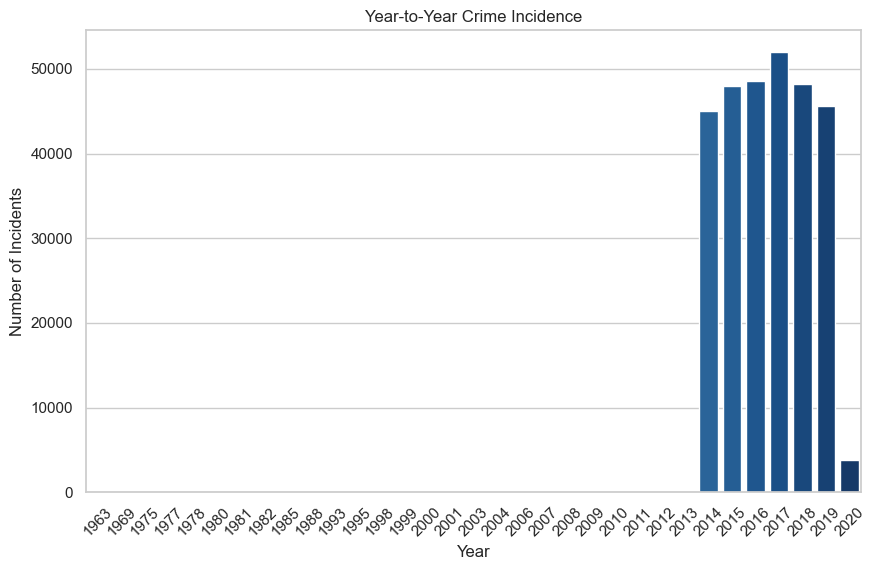

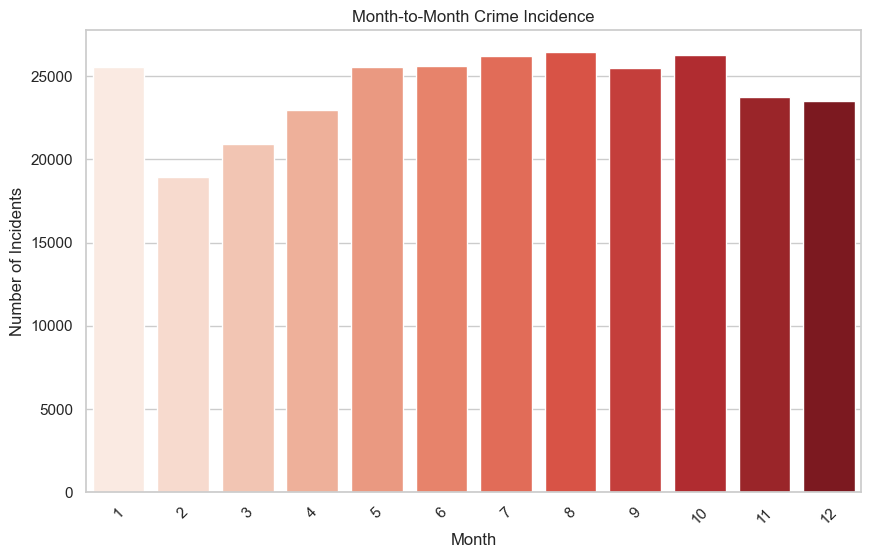

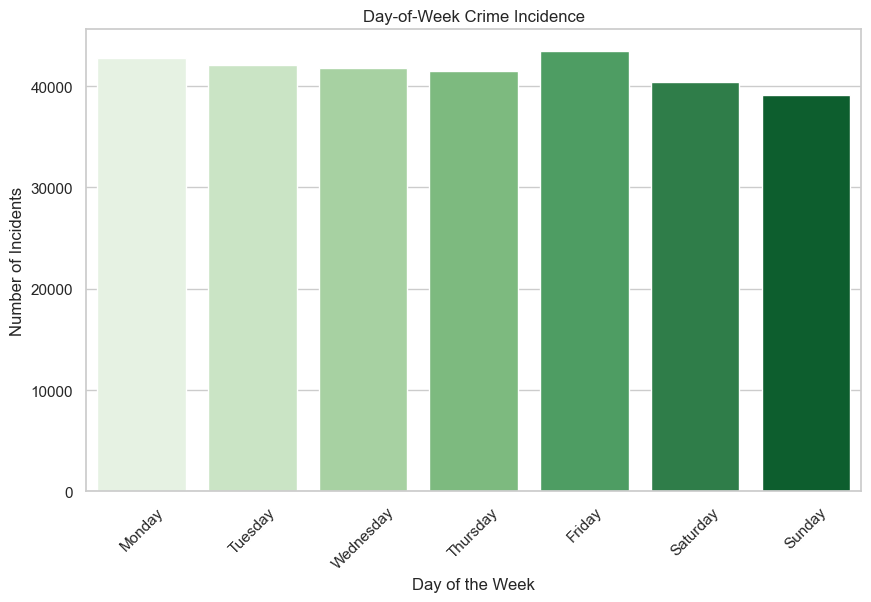

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn style for better visualization
sns.set(style="whitegrid")

# Ensure 'CrimeDate' is in datetime format
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], format='%m/%d/%Y')

# Extract Year, Month, and Day of the Week from the CrimeDate
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.day_name()

#Plotting

# Year-to-Year Crime Incidence
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df, palette='Blues')
plt.title('Year-to-Year Crime Incidence')
plt.xticks(rotation=45)
plt.ylabel('Number of Incidents')
plt.xlabel('Year')
plt.show()

# Monthly Crime Incidence
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='Reds')
plt.title('Month-to-Month Crime Incidence')
plt.xticks(rotation=45)
plt.ylabel('Number of Incidents')
plt.xlabel('Month')
plt.show()

# Day-of-Week Crime Incidence
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Greens')
plt.title('Day-of-Week Crime Incidence')
plt.xticks(rotation=45)
plt.ylabel('Number of Incidents')
plt.xlabel('Day of the Week')
plt.show()



## Task3


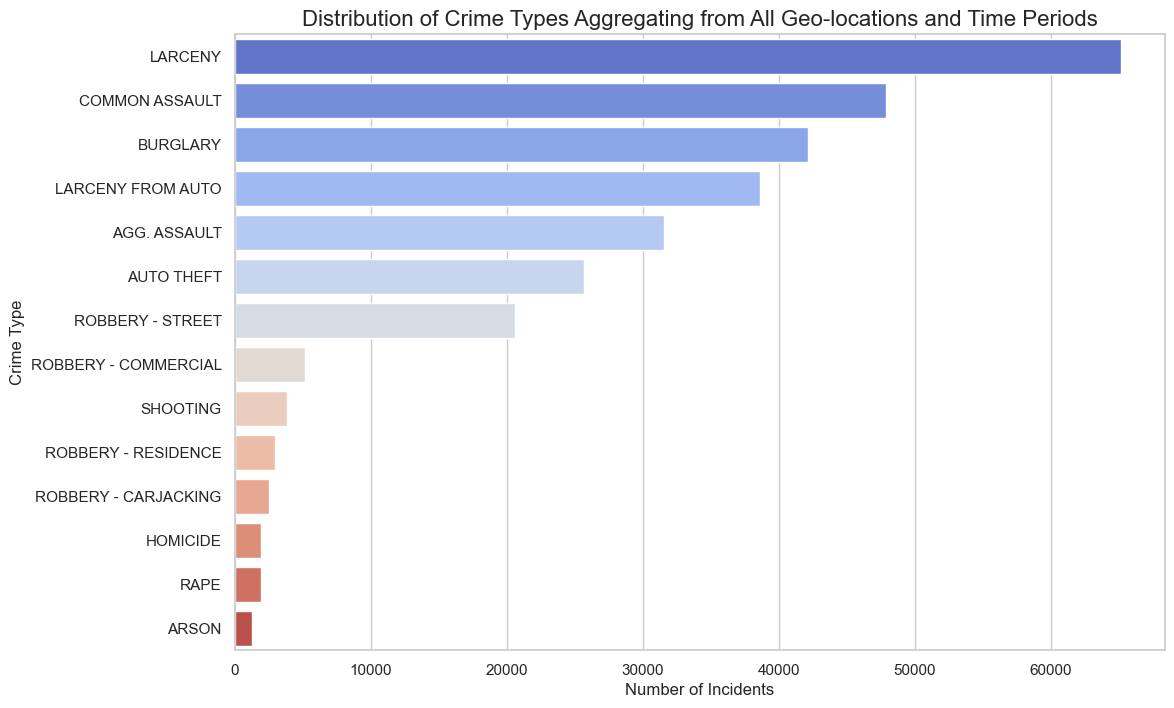

In [147]:
# Extract crime types and count the number of incidents for each type
plt.figure(figsize=(12, 8))
sns.countplot(y='Description', data=df, palette='coolwarm', order=df['Description'].value_counts().index)

# Set plot title and labels
plt.title('Distribution of Crime Types Aggregating from All Geo-locations and Time Periods', fontsize=16)
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')

# Display the plot
plt.show()


## Task4


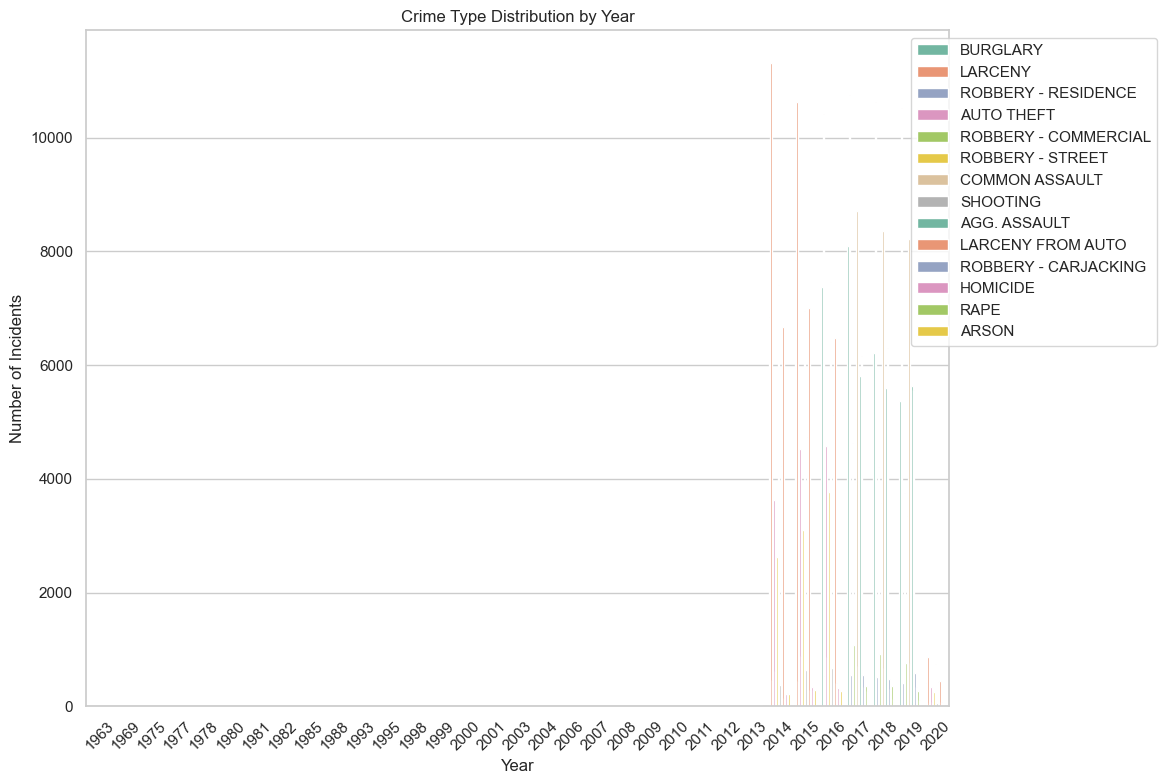

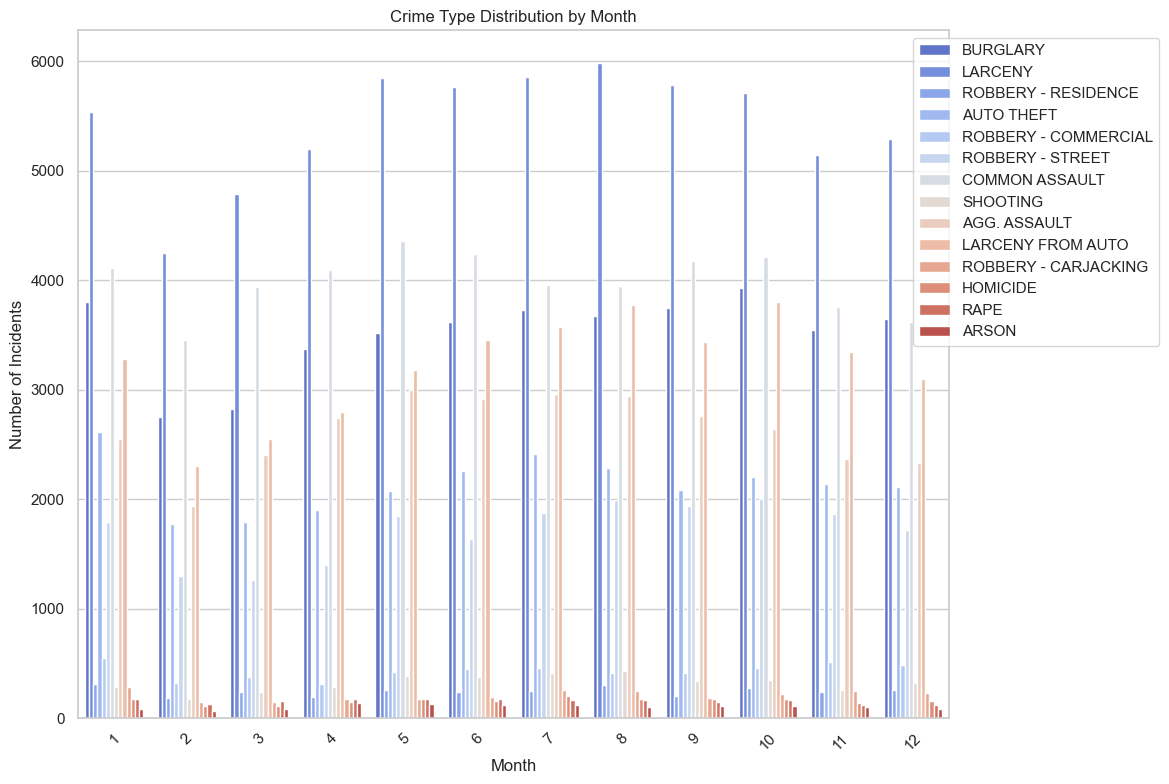

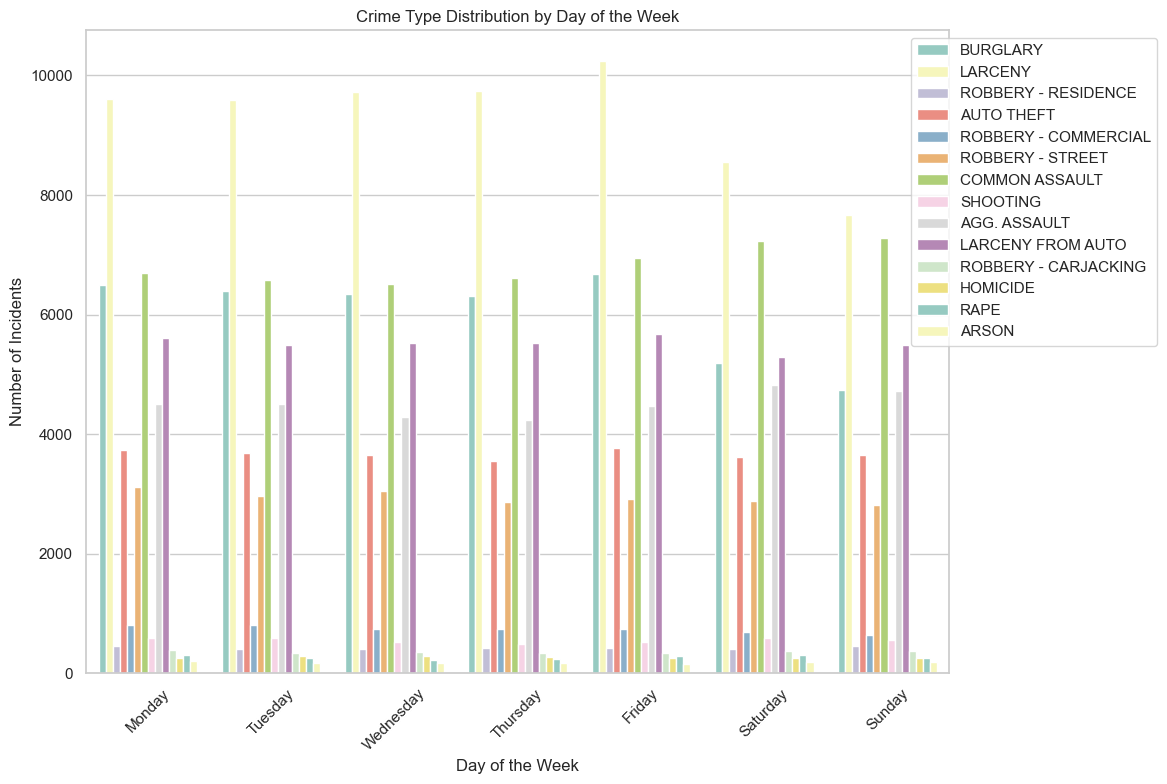

In [149]:
# Extract Year, Month, and Day of Week 
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], format='%m/%d/%Y')
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.day_name()

# Year-to-Year

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Year', hue='Description', palette='Set2')
plt.title('Crime Type Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Month-to-Month

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Month', hue='Description', palette='coolwarm')
plt.title('Crime Type Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Day-of-Week

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='DayOfWeek', hue='Description', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set3')
plt.title('Crime Type Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()


## Task5

In [151]:
pip install dash pandas plotly

Note: you may need to restart the kernel to use updated packages.


In [152]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

# Load the dataset
df = pd.read_csv('E:/IS_733/Baltimore911.csv', low_memory=False)

# Clean the column names
df.columns = df.columns.str.strip()

# Convert the 'CrimeDate' column to datetime
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], errors='coerce')

# Clean the 'Location' column (strip spaces and remove missing values)
df['Location'] = df['Location'].str.strip()
df = df.dropna(subset=['Location'])

# Initialize the Dash app
app = Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Crime Analysis Dashboard for Gary"),
    
    # Filters
    html.Label("Select Locations"),
    dcc.Dropdown(id='location-dropdown', 
                 options=[{'label': loc, 'value': loc} for loc in df['Location'].unique()],
                 multi=True, placeholder="Select Locations"),

    html.Label("Select Date Range"),
    dcc.DatePickerRange(id='date-picker', 
                        start_date=df['CrimeDate'].min(), 
                        end_date=df['CrimeDate'].max(),
                        display_format='YYYY-MM-DD'),
    
    html.Label("Select Crime Types"),
    dcc.Dropdown(id='crime-type-dropdown', 
                 options=[{'label': ctype, 'value': ctype} for ctype in df['Description'].unique()],
                 multi=True, placeholder="Select Crime Types"),

    # Graphs for temporal analysis
    dcc.Graph(id='yearly-crime-plot'),
    dcc.Graph(id='monthly-crime-plot'),
    dcc.Graph(id='dayofweek-crime-plot'),
    dcc.Graph(id='crime-type-distribution')
])

# Callback to update plots
@app.callback(
    [Output('yearly-crime-plot', 'figure'),
     Output('monthly-crime-plot', 'figure'),
     Output('dayofweek-crime-plot', 'figure'),
     Output('crime-type-distribution', 'figure')],
    [Input('location-dropdown', 'value'),
     Input('date-picker', 'start_date'),
     Input('date-picker', 'end_date'),
     Input('crime-type-dropdown', 'value')]
)
def update_plots(selected_locations, start_date, end_date, selected_crimes):
    # Filter the data based on user selections
    filtered_df = df[(df['CrimeDate'] >= pd.to_datetime(start_date)) & 
                     (df['CrimeDate'] <= pd.to_datetime(end_date))]
    
    if selected_locations:
        filtered_df = filtered_df[filtered_df['Location'].isin(selected_locations)]
    
    if selected_crimes:
        filtered_df = filtered_df[filtered_df['Description'].isin(selected_crimes)]

    # Yearly Crime Trend
    yearly_data = filtered_df.groupby(filtered_df['CrimeDate'].dt.year).size()
    fig_yearly = px.bar(yearly_data, x=yearly_data.index, y=yearly_data.values, 
                        labels={'x': 'Year', 'y': 'Crime Count'}, 
                        title="Yearly Crime Count")

    # Monthly Crime Trend
    monthly_data = filtered_df.groupby(filtered_df['CrimeDate'].dt.month).size()
    fig_monthly = px.bar(monthly_data, x=monthly_data.index, y=monthly_data.values, 
                         labels={'x': 'Month', 'y': 'Crime Count'}, 
                         title="Monthly Crime Count")

    # Day of Week Crime Trend
    dayofweek_data = filtered_df.groupby(filtered_df['CrimeDate'].dt.dayofweek).size()
    fig_dayofweek = px.bar(dayofweek_data, x=dayofweek_data.index, y=dayofweek_data.values, 
                           labels={'x': 'Day of Week', 'y': 'Crime Count'}, 
                           title="Crime Count by Day of the Week")

    # Crime Type Distribution
    crime_type_data = filtered_df['Description'].value_counts()
    fig_crime_type = px.pie(crime_type_data, values=crime_type_data.values, 
                            names=crime_type_data.index, title="Crime Type Distribution")

    return fig_yearly, fig_monthly, fig_dayofweek, fig_crime_type

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8055)  


# CODES FOR PPT

In [179]:

from skimpy import skim
import pandas as pd

# Assuming your dataframe is loaded as df

# Generate and display a summary of your data
skim(df)

D:\ann\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning:

invalid value encountered in divide



╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 290376 │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 16     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA      ┃ NA % ┃ mean   ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Longitude        │       0 │    0 │ -76.62 │ 0.04353 │ -81.53 │ -76.65 │ -76.61 │ -76.59 │ -76.38 │      ▇ │  │
│ │ Latitude         │       0 │    0 │  39.31 │ 0.02964 │  37.58 │  39.29 │   39.3 │  39.33 │  39.38 │      ▇ │  │
│ │ Location 1       │  290376 │  100 │    nan │     nan │    nan │    nan │    nan │    nan │    nan │        │  │
│ │ Total Incidents  │       0 │    0 │      1 │       0 │      1 │      1 │      1 │      1 │      1 │     ▇  │  │
│ └──────────────────┴─────────┴──────┴────────┴─────────┴────────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ CrimeDate              │      0 │         0 │     1963-10-30      │     2020-02-08      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                 ┃ NA           ┃ NA %        ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CrimeTime                   │           25 │        0.01 │                        1 │               290351 │  │
│ │ CrimeCode                   │            0 │           0 │                        1 │               290376 │  │
│ │ Location                    │            0 │           0 │                      3.4 │               997470 │  │
│ │ Description                 │            0 │           0 │                      1.8 │               534418 │  │
│ │ Inside/Outside              │        33216 │       11.44 │                     0.89 │               257160 │  │
│ │ Weapon                      │       229311 │       7

# Task 4 
#for  a dynamic tool for exploring spatial and temporal crime pattern and interactivity


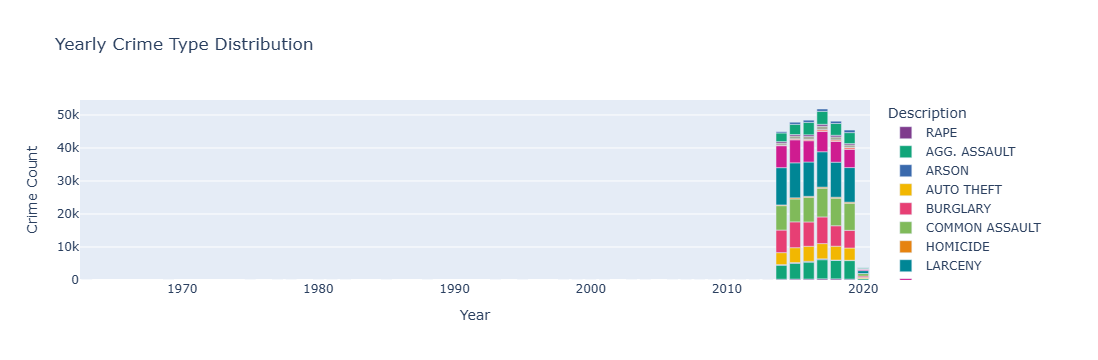

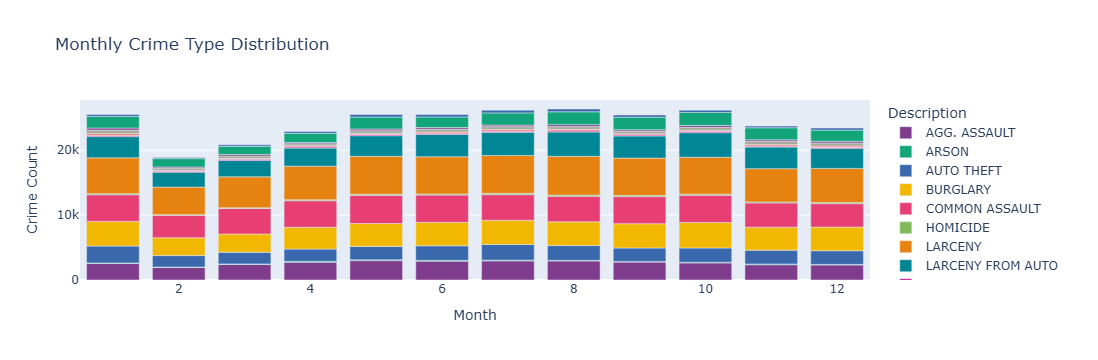

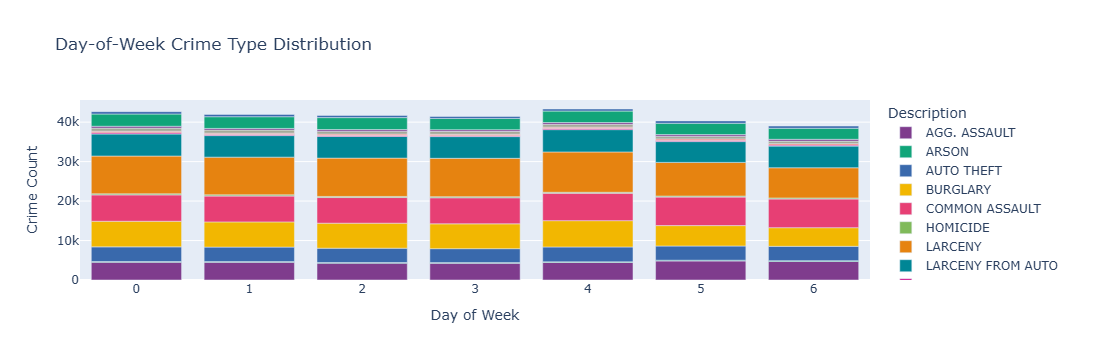

In [156]:

import plotly.express as px
import pandas as pd

# Define a color palette
color_palette = px.colors.qualitative.Bold  # You can choose different palettes like Bold, Set1, Dark2, etc.

# Yearly trend by crime type
yearly_crime_type_data = df.groupby([df['CrimeDate'].dt.year, 'Description']).size().reset_index(name='count')
fig_yearly_crime_type = px.bar(yearly_crime_type_data, 
                               x='CrimeDate', y='count', 
                               color='Description', 
                               color_discrete_sequence=color_palette,
                               labels={'CrimeDate': 'Year', 'count': 'Crime Count'},
                               title='Yearly Crime Type Distribution')

# Monthly trend by crime type
monthly_crime_type_data = df.groupby([df['CrimeDate'].dt.month, 'Description']).size().reset_index(name='count')
fig_monthly_crime_type = px.bar(monthly_crime_type_data, 
                                x='CrimeDate', y='count', 
                                color='Description', 
                                color_discrete_sequence=color_palette,
                                labels={'CrimeDate': 'Month', 'count': 'Crime Count'},
                                title='Monthly Crime Type Distribution')

# Day-of-week trend by crime type
dayofweek_crime_type_data = df.groupby([df['CrimeDate'].dt.dayofweek, 'Description']).size().reset_index(name='count')
fig_dayofweek_crime_type = px.bar(dayofweek_crime_type_data, 
                                  x='CrimeDate', y='count', 
                                  color='Description', 
                                  color_discrete_sequence=color_palette,
                                  labels={'CrimeDate': 'Day of Week', 'count': 'Crime Count'},
                                  title='Day-of-Week Crime Type Distribution')

# Show plots
fig_yearly_crime_type.show()
fig_monthly_crime_type.show()
fig_dayofweek_crime_type.show()
